In [15]:
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Dove.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

In [16]:
import os
import pandas as pd
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Dove.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Specify the source directory where the CSV files are stored
source_directory = config['Dove_directory']
print("source_directory =", source_directory)

# Specify the base target directory and subdirectory where you want to save the Excel files
base_target_directory = config['output_directories']
subdirectory_name = 'Dove_TB_ex'

# Create the full target directory path including the subdirectory
full_target_directory = os.path.join(base_target_directory, subdirectory_name)

# Create the target directory including the subdirectory if it does not exist
if not os.path.exists(full_target_directory):
    os.makedirs(full_target_directory)

# Loop through all files in the source directory
for file_name in os.listdir(source_directory):
    if file_name.endswith('.csv'):
        # Construct the full path of the source file
        source_file_path = os.path.join(source_directory, file_name)
        
        # Load the CSV file
        df = pd.read_csv(source_file_path)
        
        # Construct the target file path with the .xlsx extension in the subdirectory
        target_file_path = os.path.join(full_target_directory, file_name.replace('.csv', '.xlsx'))
        
        # Convert the DataFrame to an Excel file
        df.to_excel(target_file_path, index=False)

print(f"All CSV files have been converted to Excel files and saved in the directory: {full_target_directory}.")


source_directory = /Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Scoring_Functions/GNN_Dove/Data_Dove/Dove_TB
All CSV files have been converted to Excel files and saved in the directory: //Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Scoring_Functions/GNN_Dove/Data_Dove/Dove_TB_ex.


In [17]:
import os
import pandas as pd


# Specify the source directory where the Excel files are stored
source_directory = os.path.join(config['output_directories'], 'Dove_TB_ex')

# Specify the base target directory and the subdirectory where you want to save the processed Excel files
base_target_directory = config['output_directories']
subdirectory_name = 'Dove_TB_rank'

# Create the full target directory path including the subdirectory
full_target_directory = os.path.join(base_target_directory, subdirectory_name)

# Create the target directory including the subdirectory if it does not exist
if not os.path.exists(full_target_directory):
    os.makedirs(full_target_directory)

# Process each Excel file in the source directory
for file_name in os.listdir(source_directory):
    if file_name.endswith('.xlsx'):
        # Load the Excel file
        source_file_path = os.path.join(source_directory, file_name)
        df = pd.read_excel(source_file_path)

        # Filter rows where 'Filename' starts with 'ranked'
        df_filtered = df[df['Filename'].str.startswith('ranked')]

        # Sort the filtered DataFrame based on the 'Value' column from largest to smallest
        df_sorted = df_filtered.sort_values(by='Value', ascending=False)

        # Add the 'dove rank' column, starting from 0
        df_sorted['dove rank'] = range(len(df_sorted))

        # Construct the target file path within the subdirectory
        target_file_path = os.path.join(full_target_directory, file_name.replace('.xlsx', '_ranked.xlsx'))
        
        # Save the processed DataFrame to a new Excel file
        df_sorted.to_excel(target_file_path, index=False)

print(f"All files have been processed and saved in the directory: {full_target_directory}.")


All files have been processed and saved in the directory: //Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Scoring_Functions/GNN_Dove/Data_Dove/Dove_TB_rank.


In [18]:
import os

def rename_files_in_directory(directory_path):
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the filename contains the character to be replaced
        if '-' in filename:
            # Construct the new filename by replacing "-" with "_"
            new_filename = filename.replace('-', '_')
            # Construct the full old and new file paths
            old_file_path = os.path.join(directory_path, filename)
            new_file_path = os.path.join(directory_path, new_filename)
            # Rename the file
            os.rename(old_file_path, new_file_path)
            #print(f'Renamed "{filename}" to "{new_filename}"')

# Specify the directory path
directory_path = os.path.join(config['output_directories'], 'Dove_TB_rank')

# Call the function
rename_files_in_directory(directory_path)



In [21]:
import os
import shutil
import pandas as pd
from openpyxl import load_workbook

def extract_pdb_id_from_dockq(filename):
    """Extracts the PDB ID from a DockQ filename."""
    parts = filename.split('_')
    return parts[0]  # PDB ID is the first part

def extract_pdb_id_from_Dove(filename):
    """Extracts the PDB ID from a Dove filename."""
    parts = filename.split('_')
    return parts[1]  # PDB ID is after 'Dove_scoring'

def copy_Dove_sheets_to_dockq(dockq_dir, Dove_dir, output_dir, subdirectory_name):
    final_output_dir = os.path.join(output_dir, subdirectory_name)
    if not os.path.exists(final_output_dir):
        os.makedirs(final_output_dir)
    
    dockq_files = os.listdir(dockq_dir)
    Dove_files = os.listdir(Dove_dir)
    
    # Map Dove files to their PDB IDs
    Dove_map = {extract_pdb_id_from_Dove(f).upper(): f for f in Dove_files if 'ranked' in f}
    
    for dockq_file in dockq_files:
        if dockq_file.endswith('_TB.xlsx') and 'DockQ_data' in dockq_file:
            pdb_id = extract_pdb_id_from_dockq(dockq_file).upper()
            if pdb_id in Dove_map:
                dockq_path = os.path.join(dockq_dir, dockq_file)
                Dove_path = os.path.join(Dove_dir, Dove_map[pdb_id])
                output_path = os.path.join(final_output_dir, dockq_file)
                
                # Copy the DockQ file to the final output directory if it's not already there
                if not os.path.exists(output_path):
                    shutil.copyfile(dockq_path, output_path)
                
                print(f"Processing {dockq_file} and {Dove_map[pdb_id]} for PDB ID {pdb_id}")
                
                Dove_df = pd.read_excel(Dove_path, sheet_name='Sheet1')
                
                with pd.ExcelWriter(output_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                    Dove_df.to_excel(writer, sheet_name='gnn_dove', index=False)
                    
                    print(f'Updated {dockq_file} with gnn_dove data for PDB ID {pdb_id}')
            else:
                print(f"No matching gnn_dove file found for {dockq_file}")

# Define the paths from the configuration

Dove_dir = os.path.join(config['output_directories'], 'Dove_TB_rank')
subdirectory_name = 'Dove_DockQ_TB'

copy_Dove_sheets_to_dockq(config['TB_uni'], Dove_dir, config['output_directories'], subdirectory_name)


Processing 8C3H_DockQ_data_TB.xlsx and TB_8c3h_ranked.xlsx for PDB ID 8C3H
Updated 8C3H_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 8C3H
Processing 7QOX_DockQ_data_TB.xlsx and TB_7qox_ranked.xlsx for PDB ID 7QOX
Updated 7QOX_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 7QOX
Processing 8F8Z_DockQ_data_TB.xlsx and TB_8f8z_ranked.xlsx for PDB ID 8F8Z
Updated 8F8Z_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 8F8Z
Processing 8CK5_DockQ_data_TB.xlsx and TB_8ck5_ranked.xlsx for PDB ID 8CK5
Updated 8CK5_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 8CK5
Processing 8DGM_DockQ_data_TB.xlsx and TB_8dgm_ranked.xlsx for PDB ID 8DGM
Updated 8DGM_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 8DGM
Processing 7XV1_DockQ_data_TB.xlsx and TB_7xv1_ranked.xlsx for PDB ID 7XV1
Updated 7XV1_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 7XV1
Processing 8A68_DockQ_data_TB.xlsx and TB_8a68_ranked.xlsx for PDB ID 8A68
Updated 8A68_DockQ_data_TB.xlsx with gnn_dove data for PDB ID 8A68
Proces

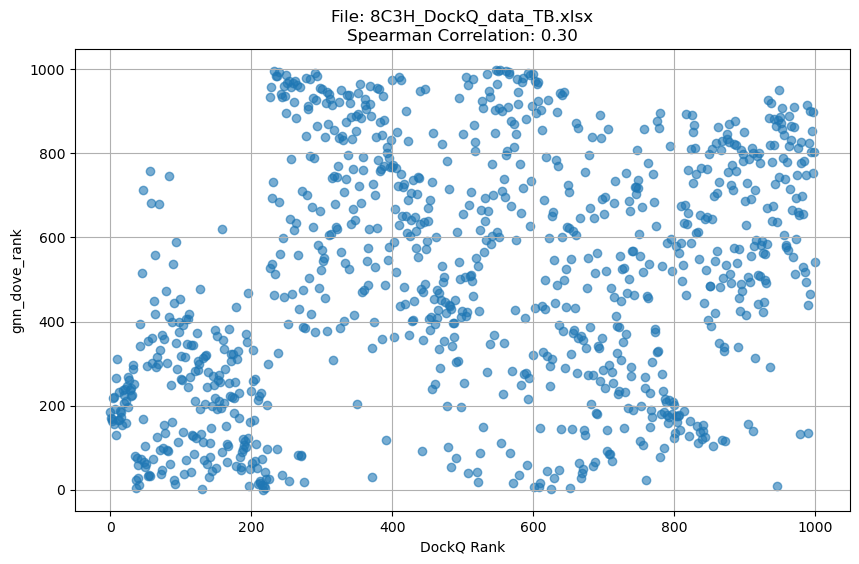

File: 8C3H_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.29678890478890485



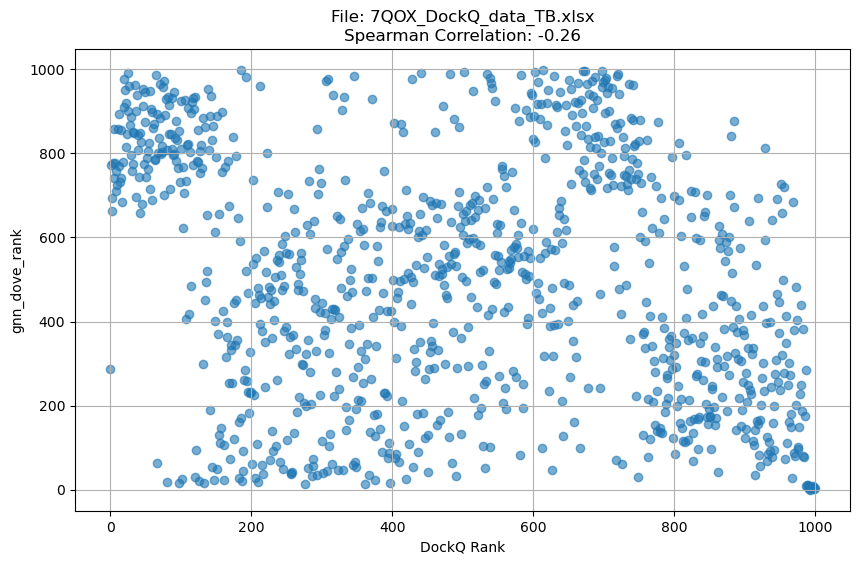

File: 7QOX_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.25645546045546047



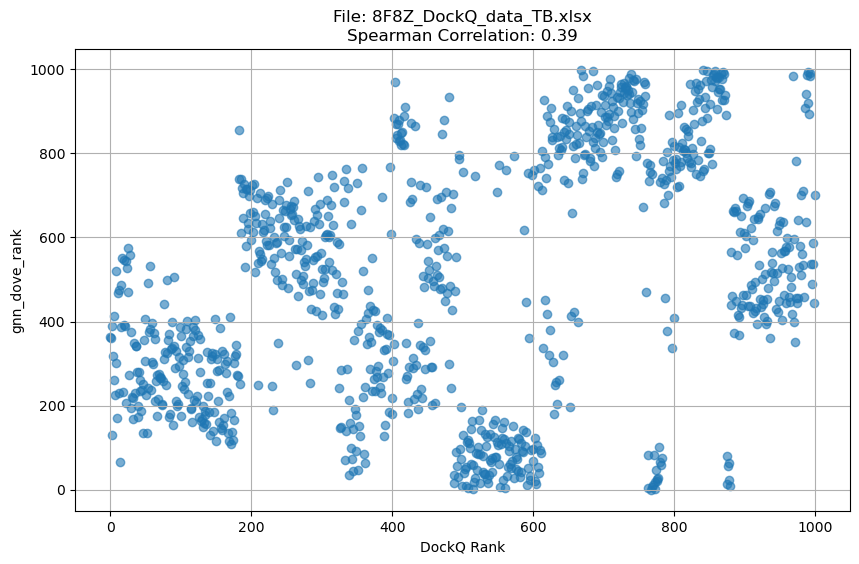

File: 8F8Z_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.3890734730734731



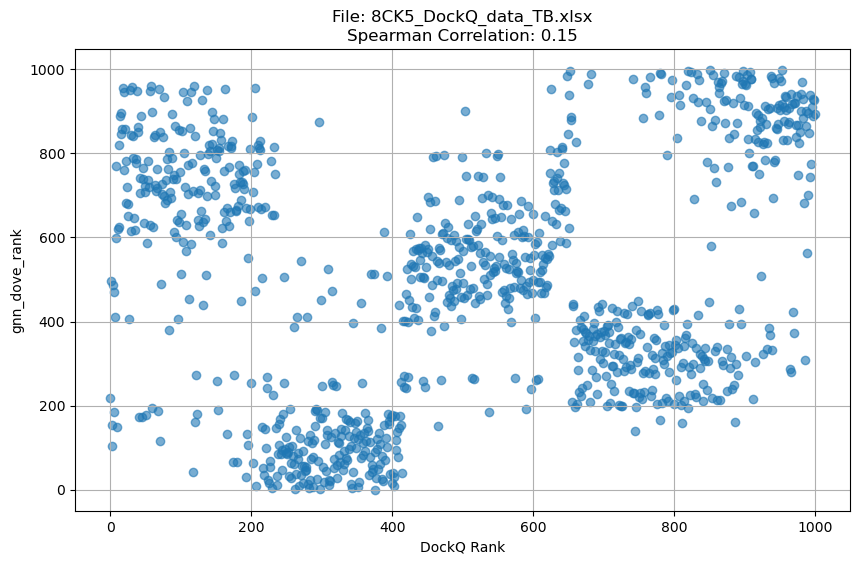

File: 8CK5_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.14661065061065062



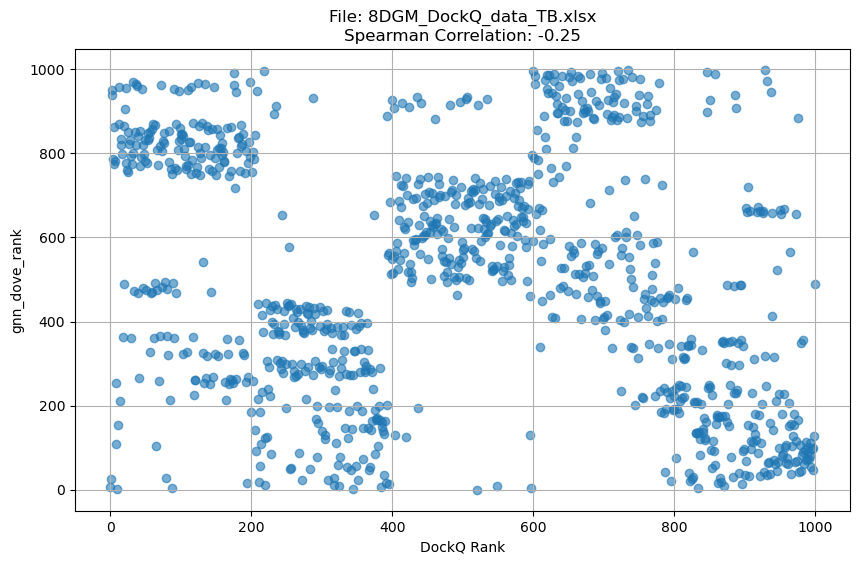

File: 8DGM_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.24821398421398425



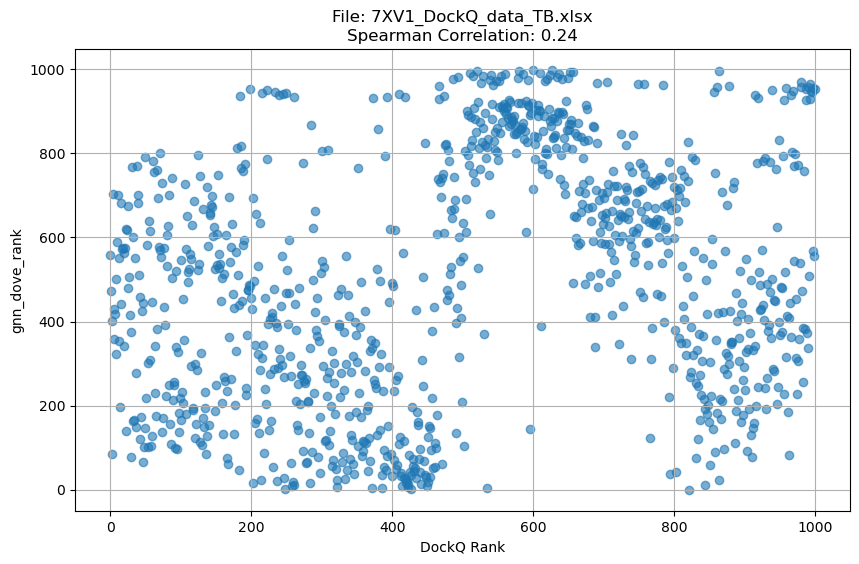

File: 7XV1_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.2436098436098436



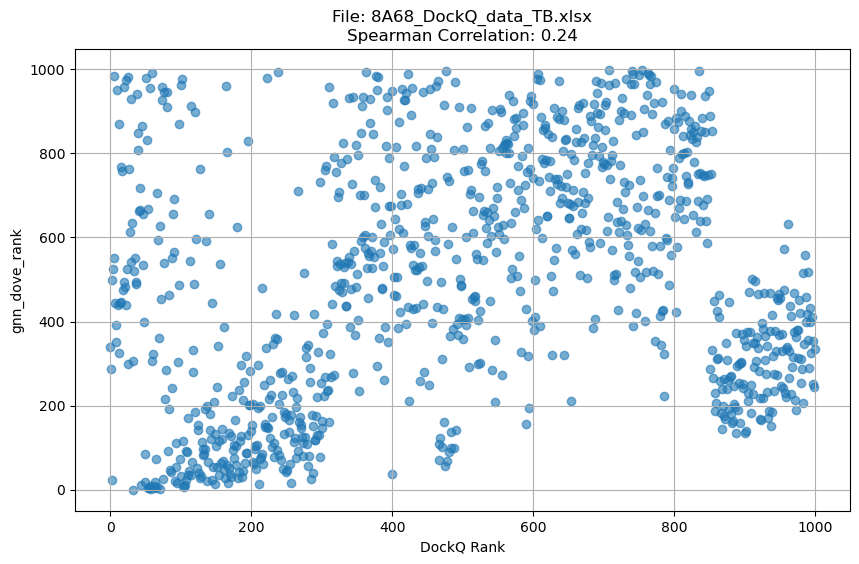

File: 8A68_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.23791101391101394



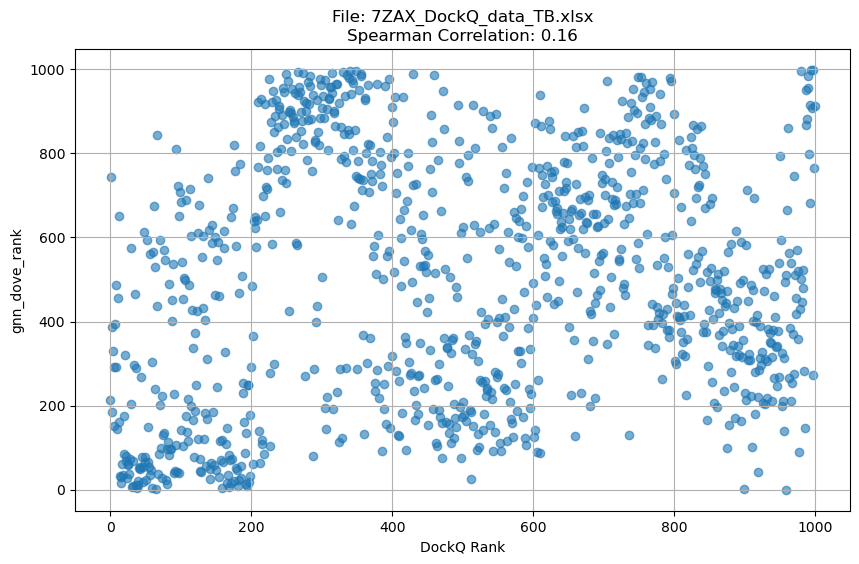

File: 7ZAX_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.16343641943641946



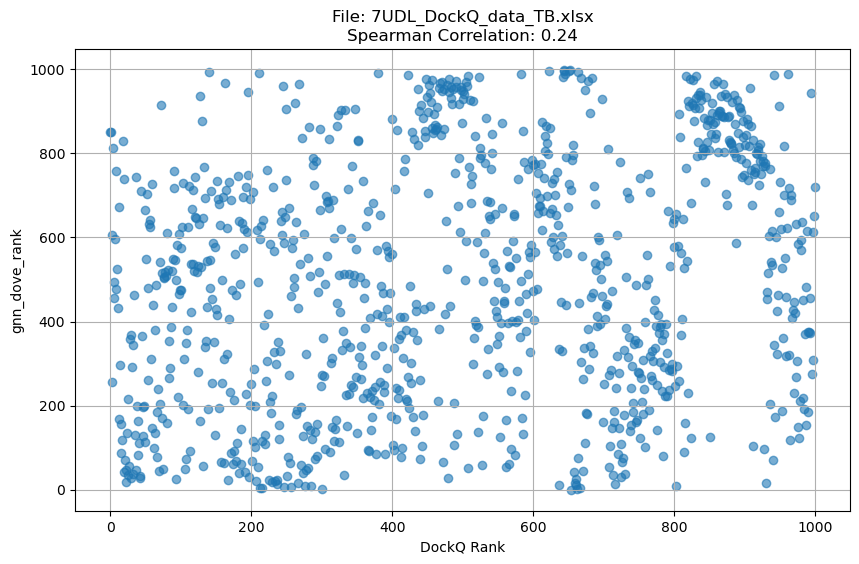

File: 7UDL_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.24261002661002662



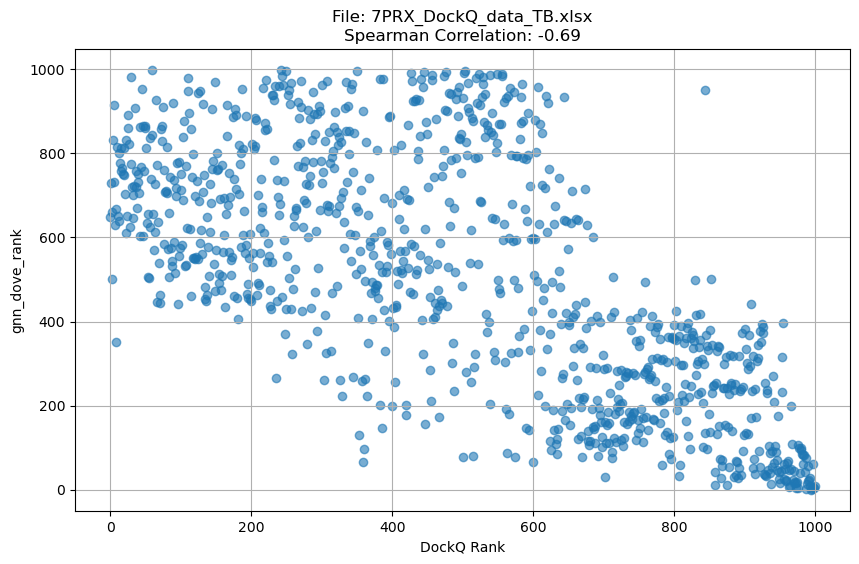

File: 7PRX_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.6854922494922495



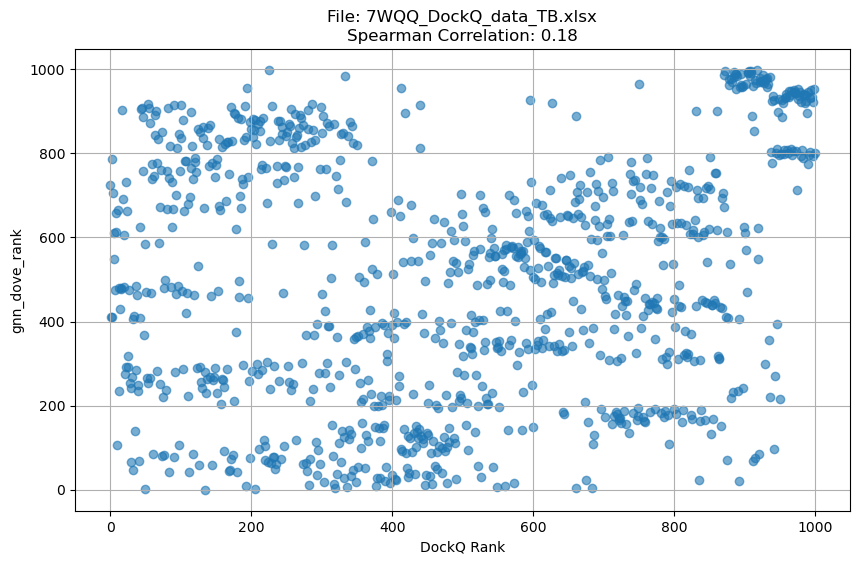

File: 7WQQ_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.17593365193365193



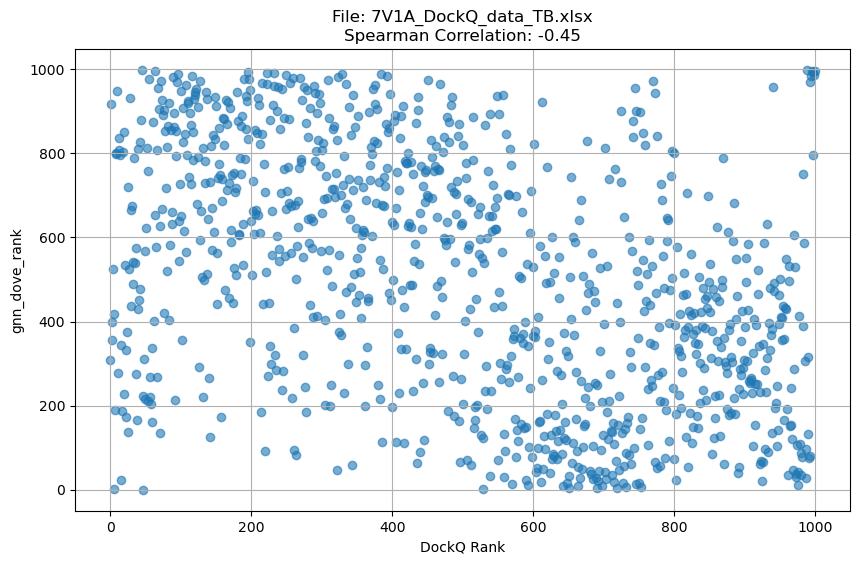

File: 7V1A_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.4546081906081907



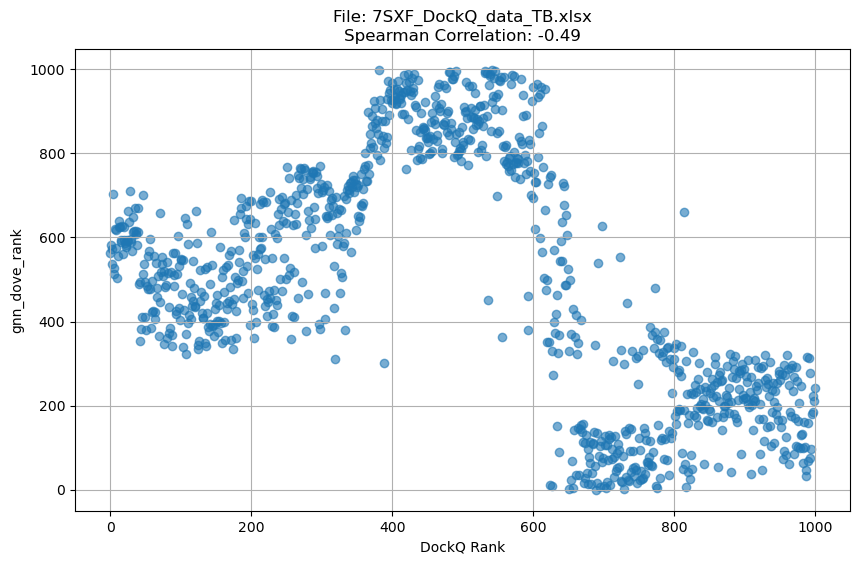

File: 7SXF_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.4926279606279607



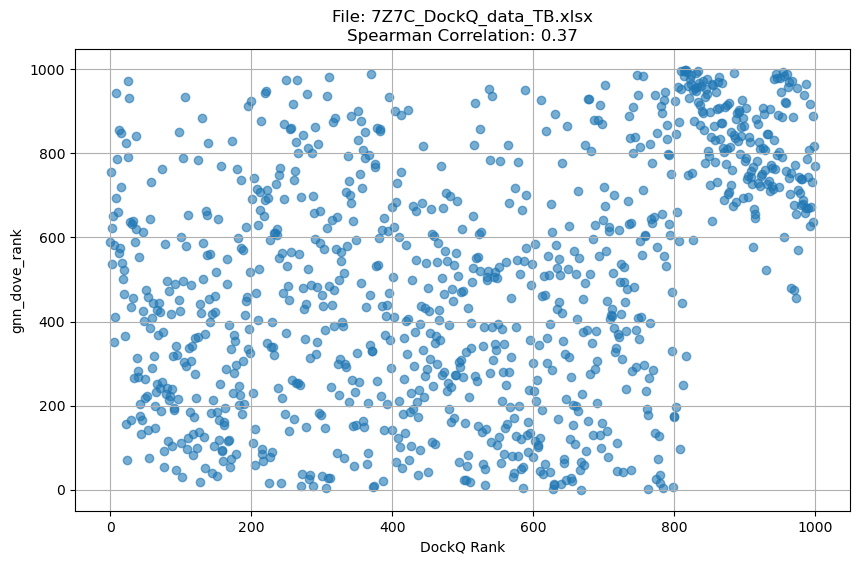

File: 7Z7C_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.37004413004413006



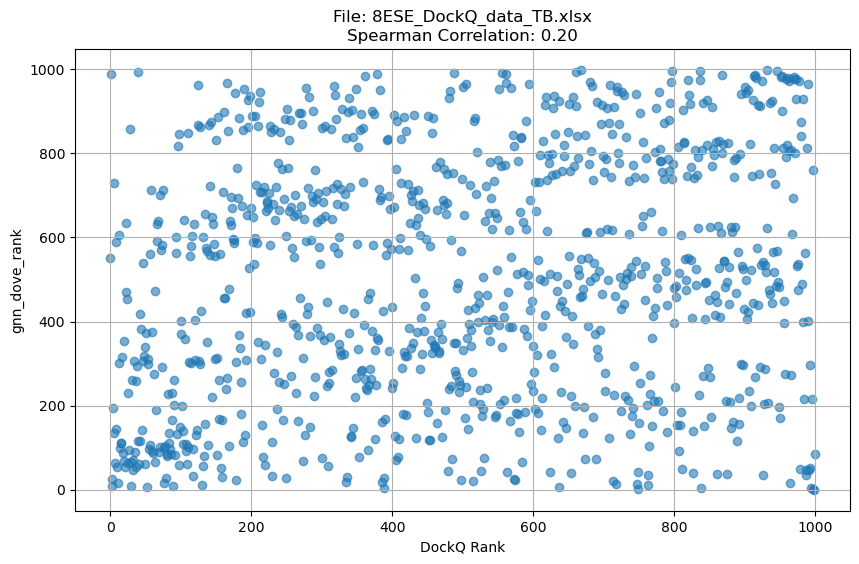

File: 8ESE_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.19878669078669078



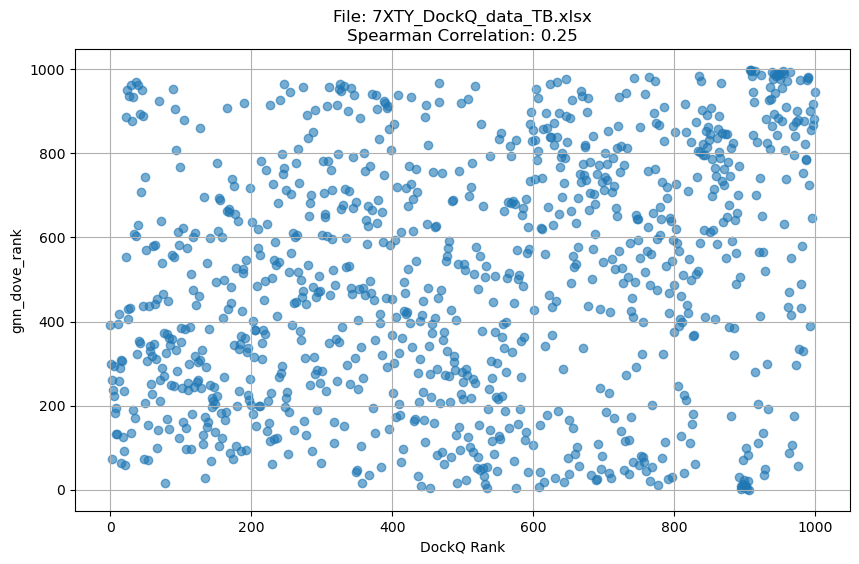

File: 7XTY_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.2457256017256017



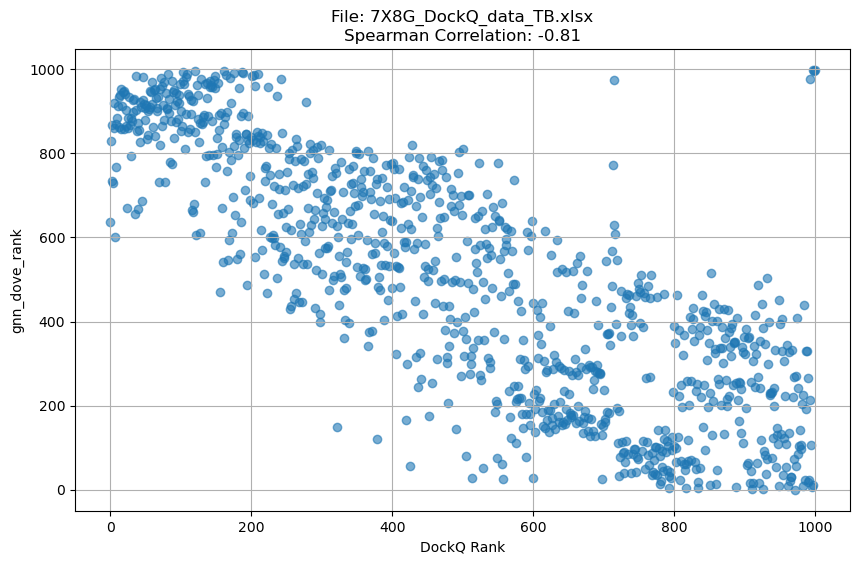

File: 7X8G_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.8109765669765671



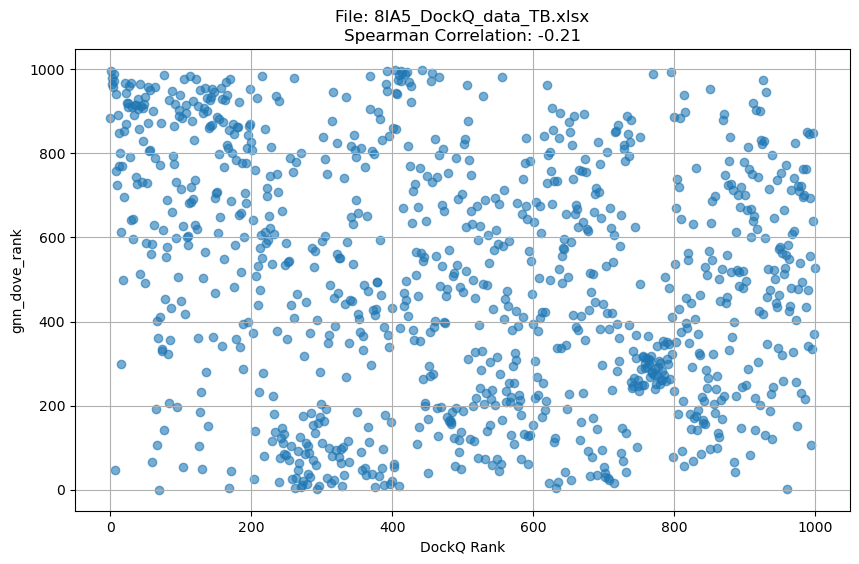

File: 8IA5_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.21015839415839419



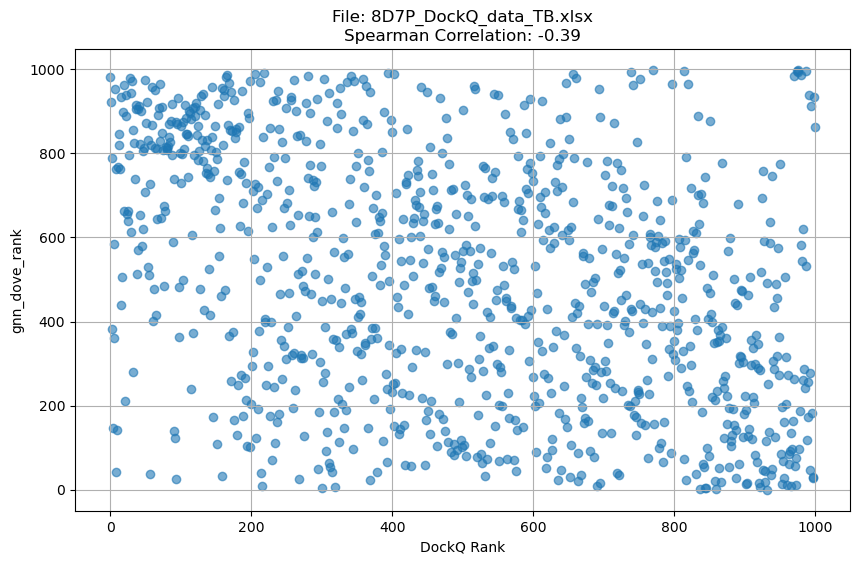

File: 8D7P_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.3910619350619351



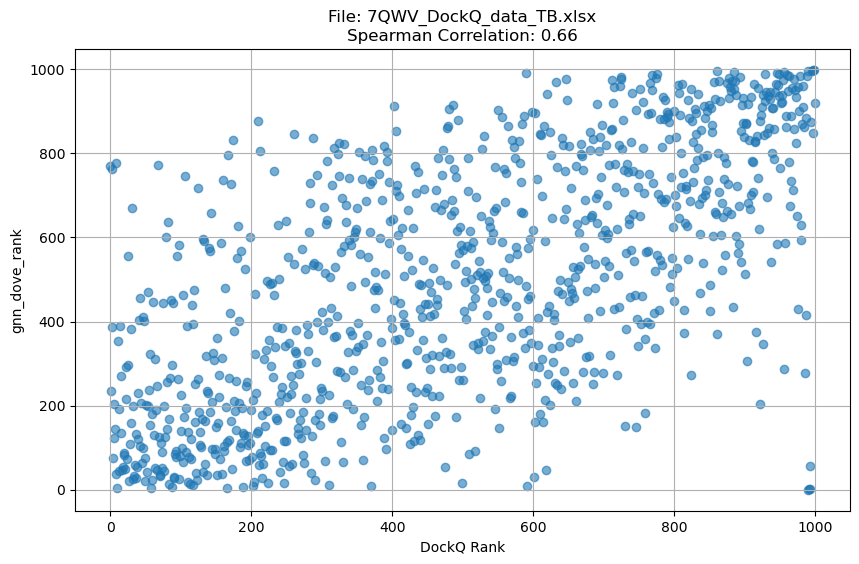

File: 7QWV_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.6569926649926651



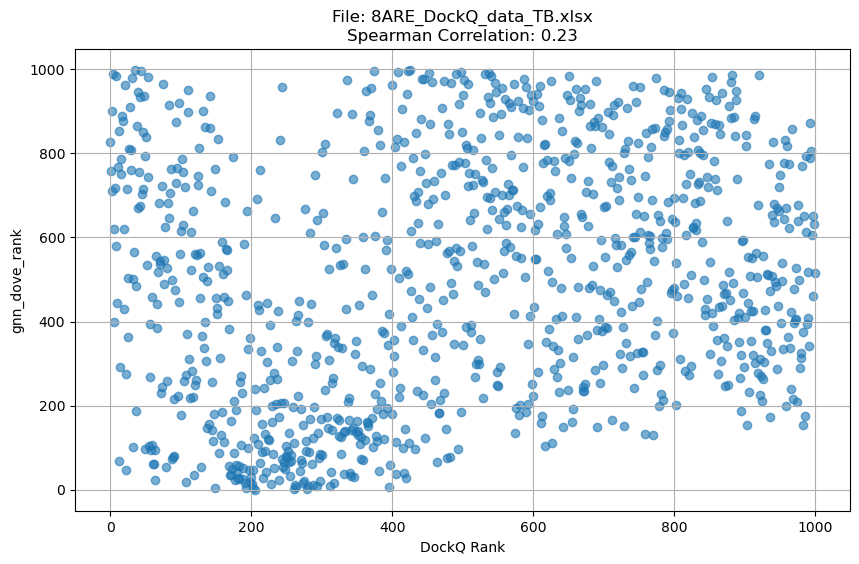

File: 8ARE_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.23432631032631032



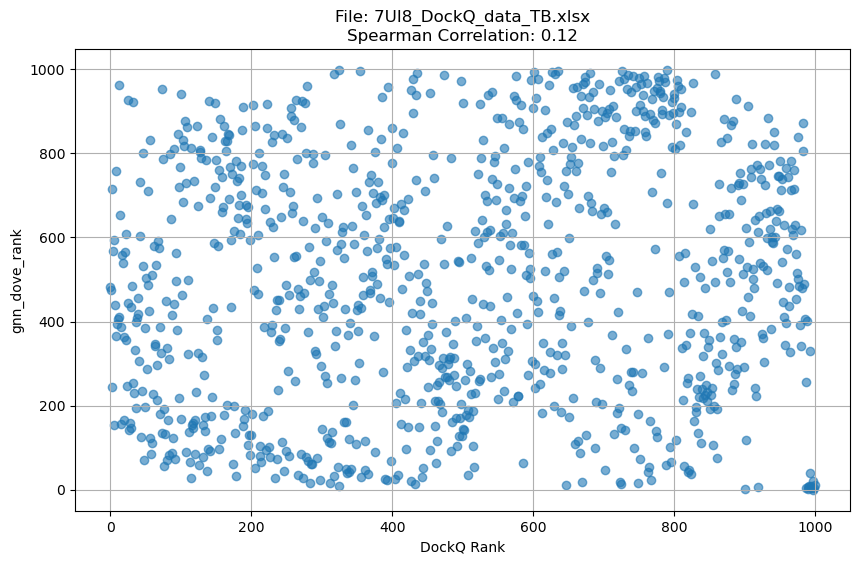

File: 7UI8_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.12275486675486676



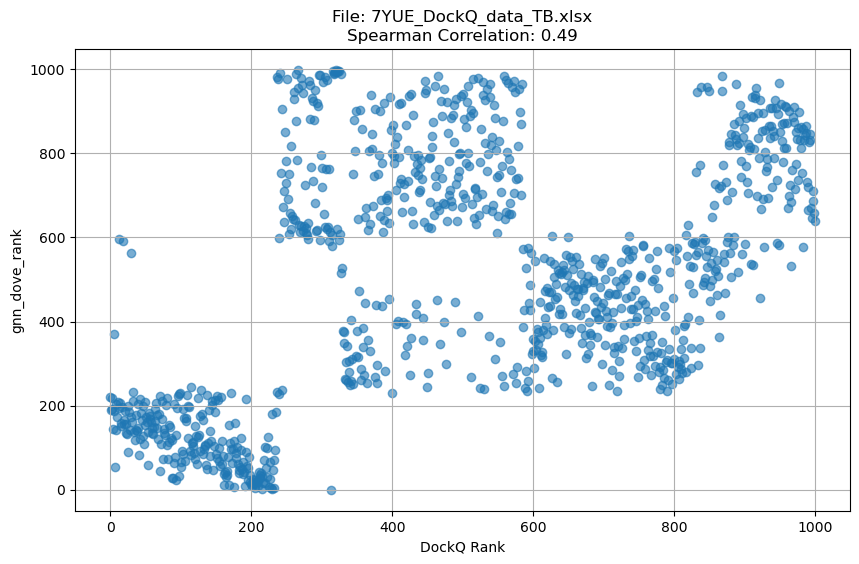

File: 7YUE_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.48755556755556756



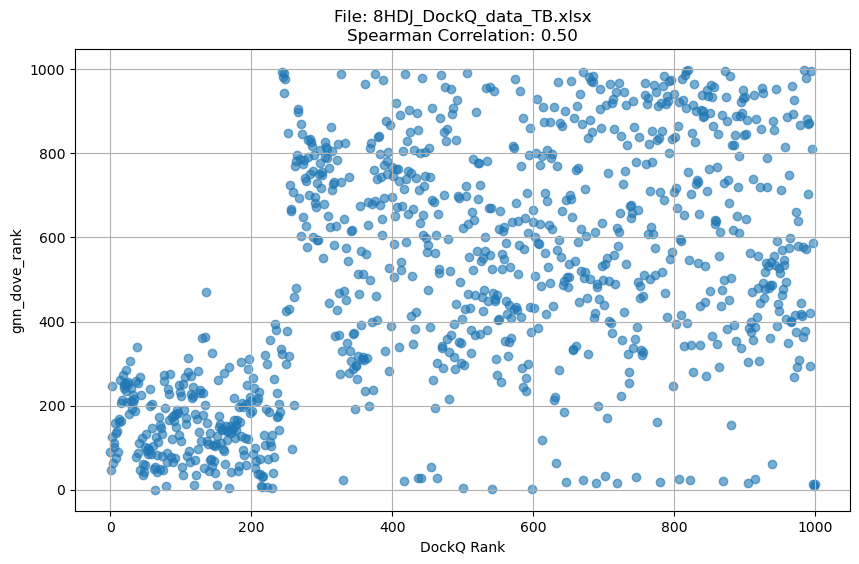

File: 8HDJ_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.5021560181560182



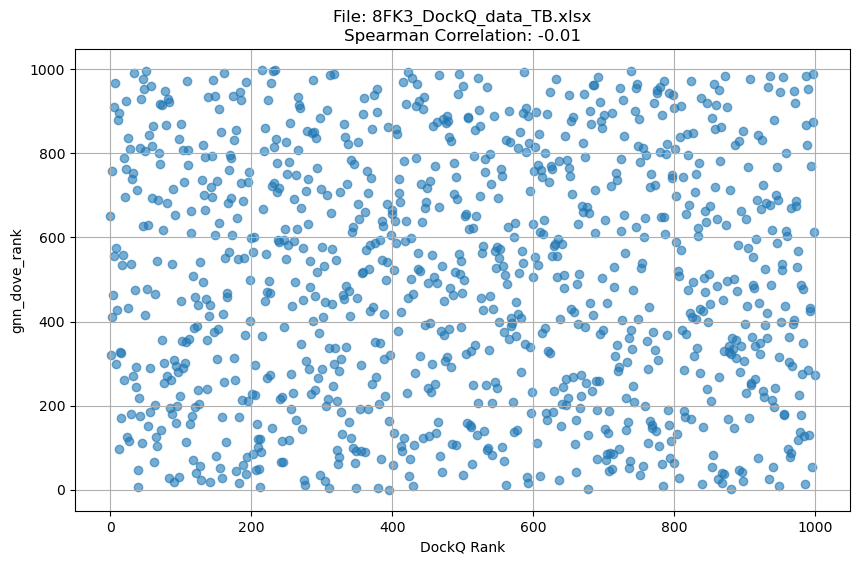

File: 8FK3_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.011101739101739103



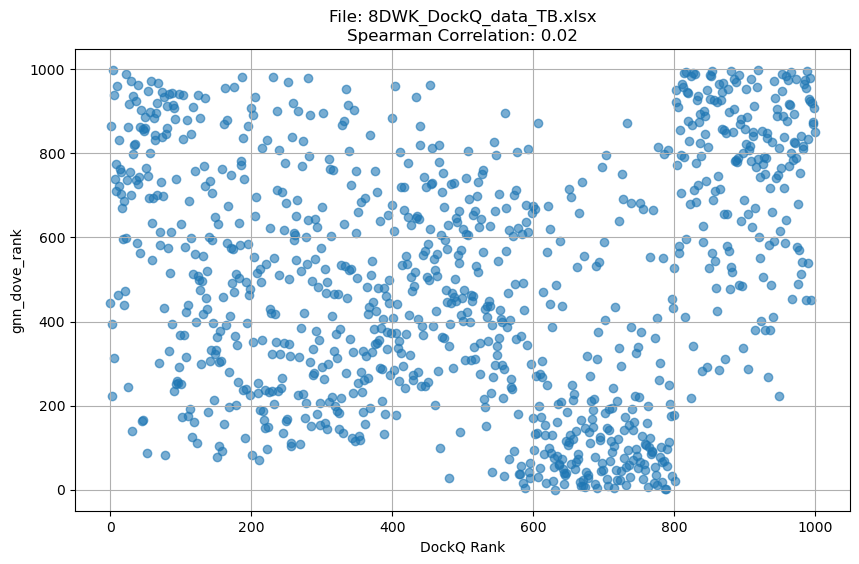

File: 8DWK_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.021096921096921097



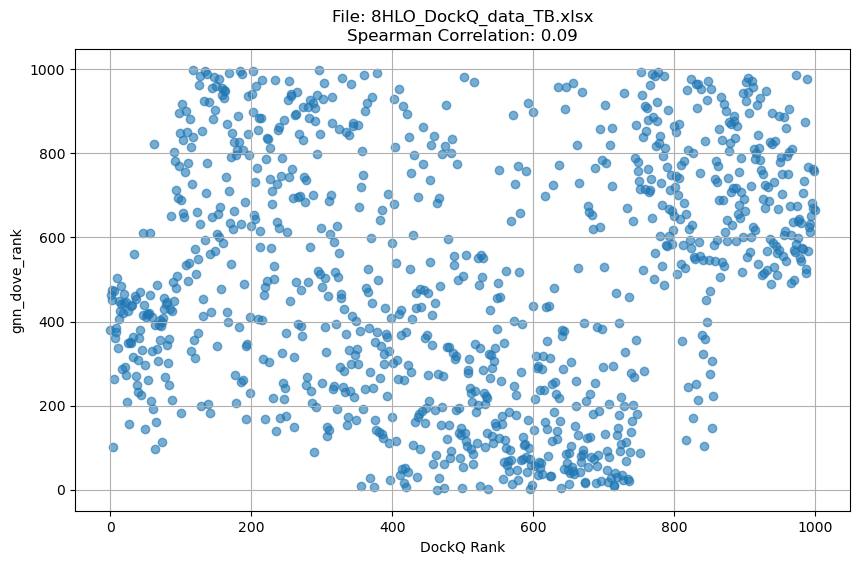

File: 8HLO_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.09110839910839912



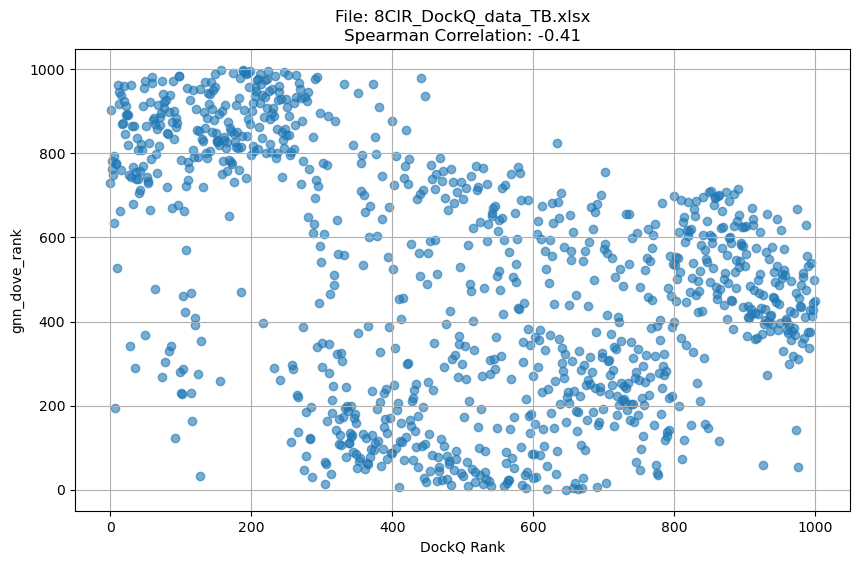

File: 8CIR_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.4103056703056704



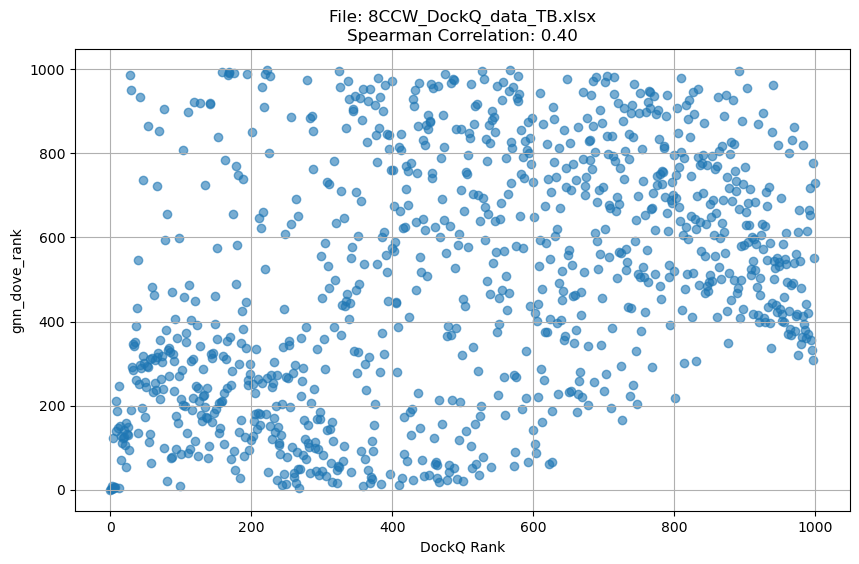

File: 8CCW_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.4031600951600952



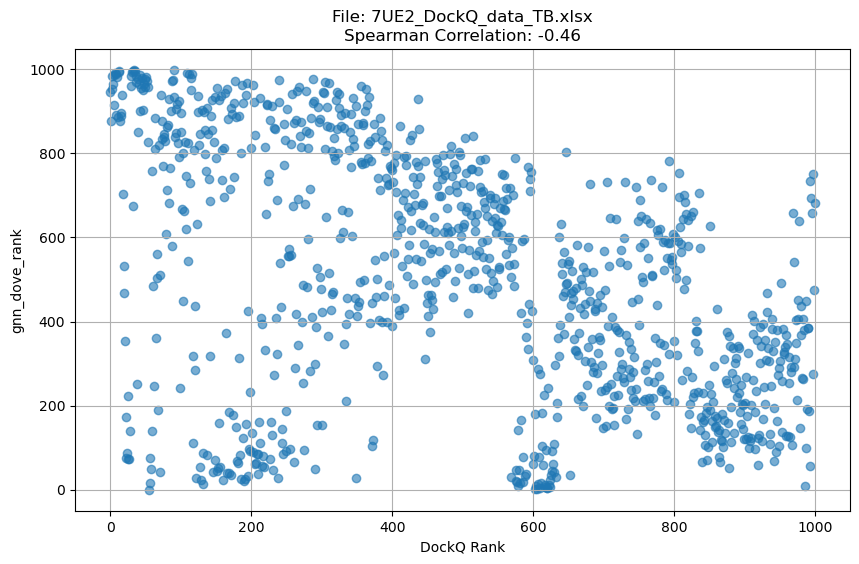

File: 7UE2_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.45891389091389095



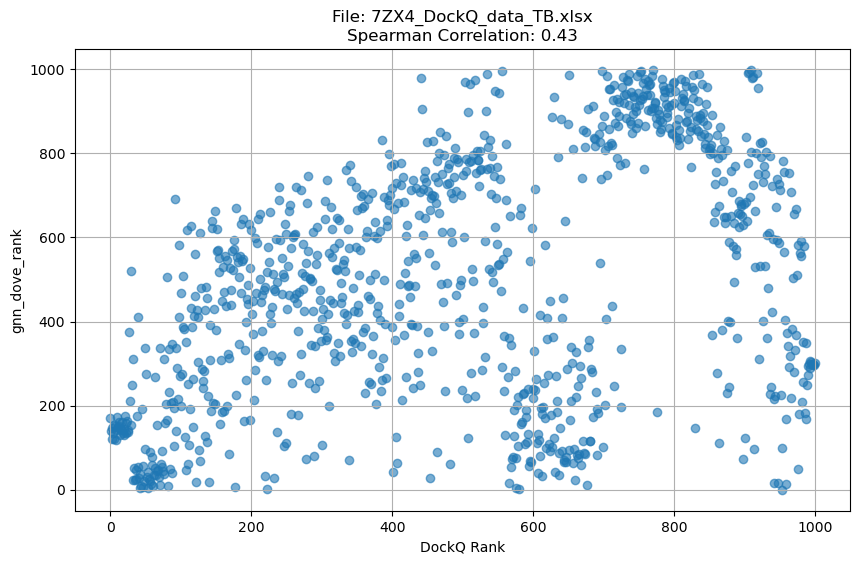

File: 7ZX4_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.4287803007803008



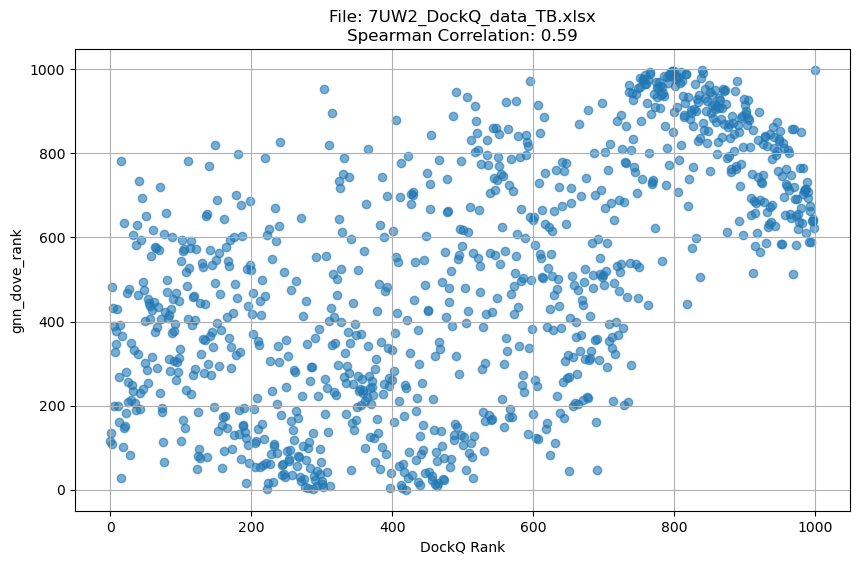

File: 7UW2_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.5901401301401301



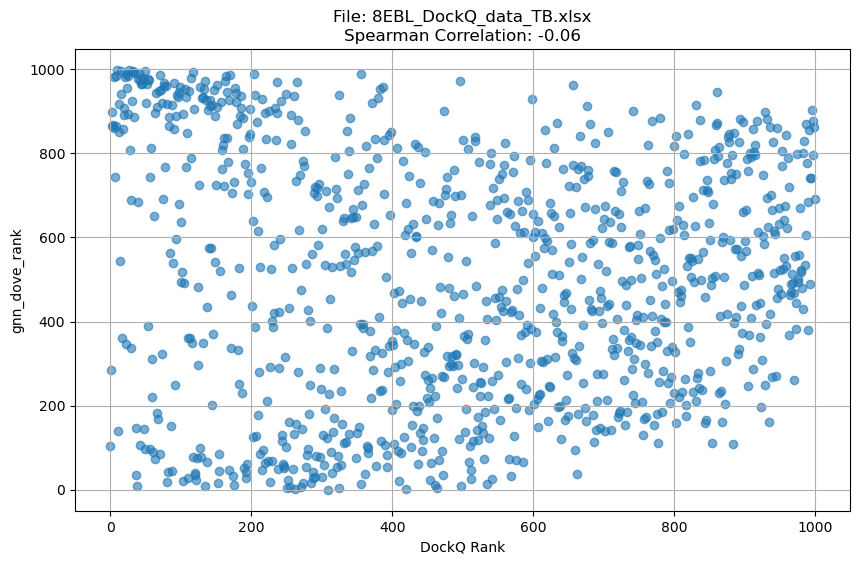

File: 8EBL_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.058735174735174735



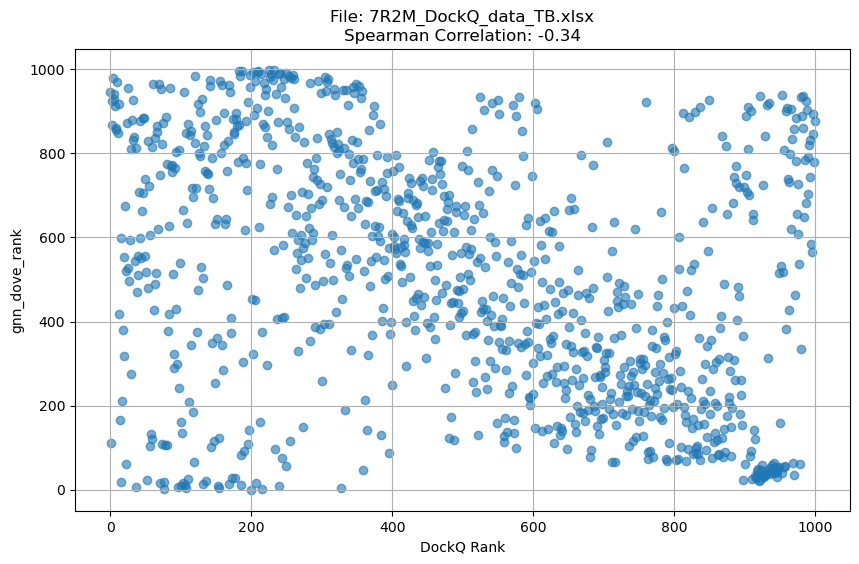

File: 7R2M_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.34482608082608085



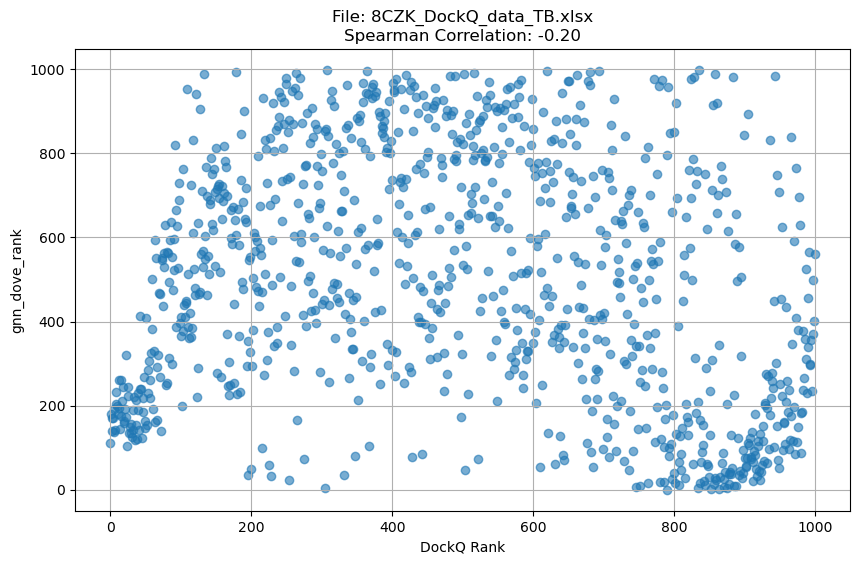

File: 8CZK_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.19514665514665516



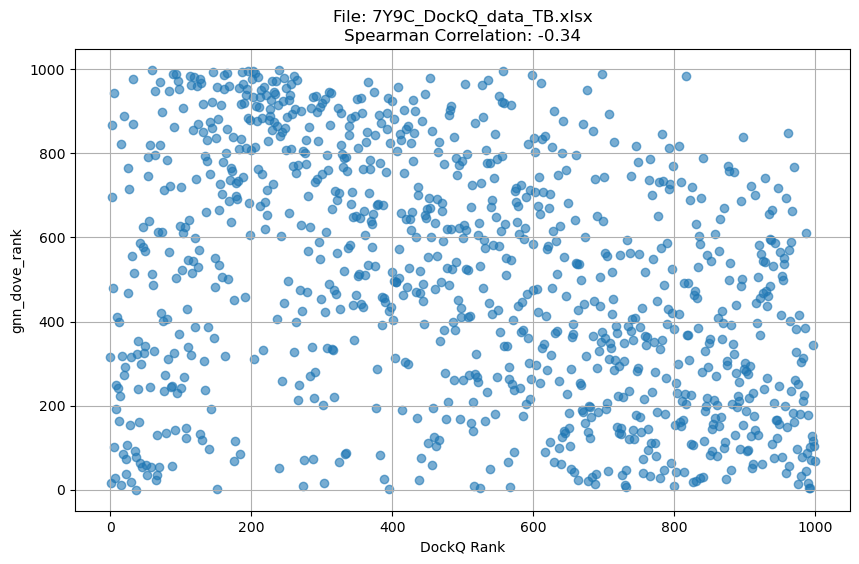

File: 7Y9C_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.3406258726258726



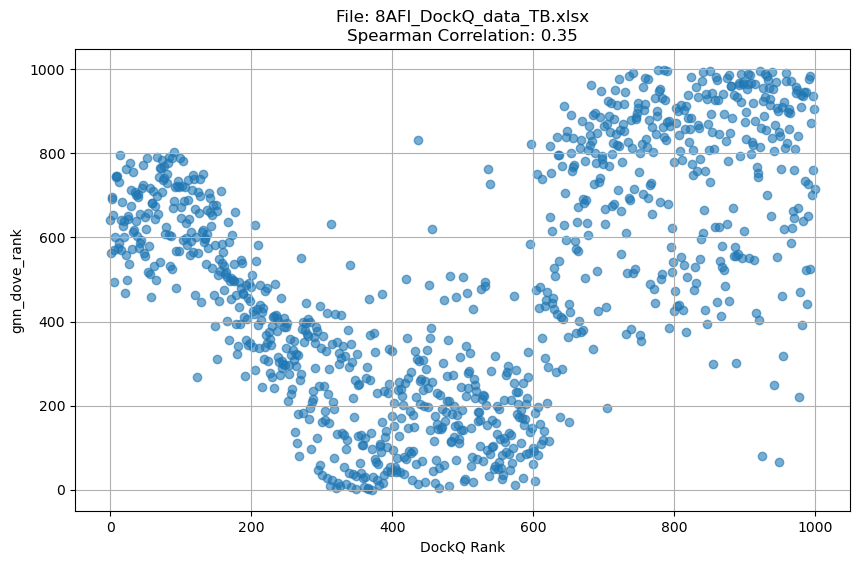

File: 8AFI_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.3500984540984541



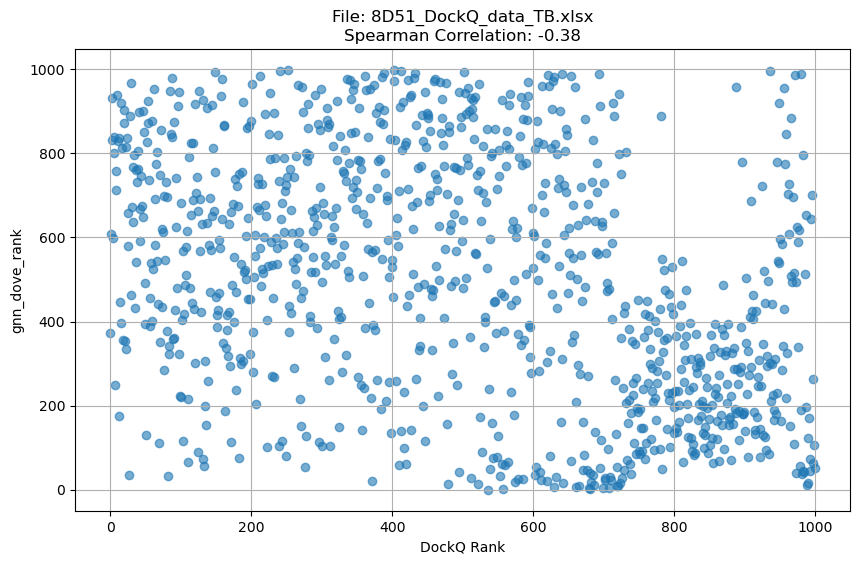

File: 8D51_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.3832073512073512



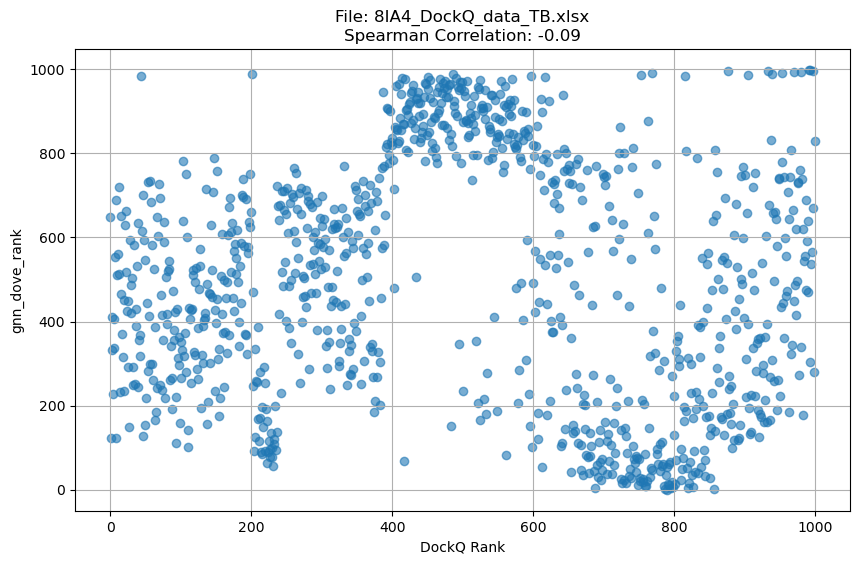

File: 8IA4_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.0895000975000975



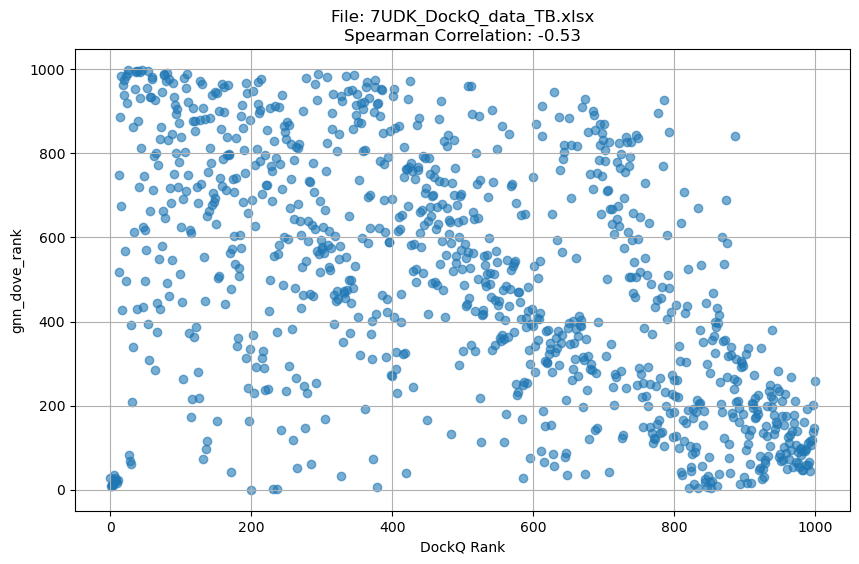

File: 7UDK_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.5270356910356911



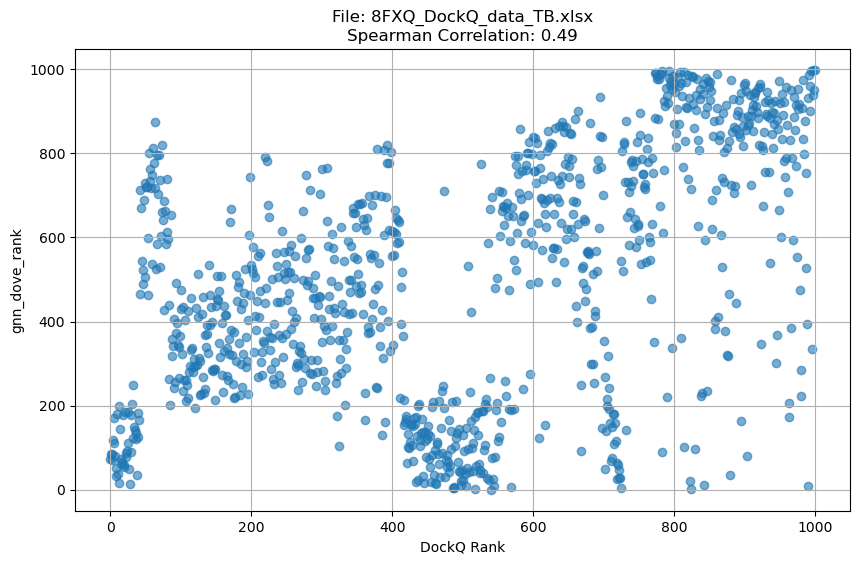

File: 8FXQ_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.48547256947256956



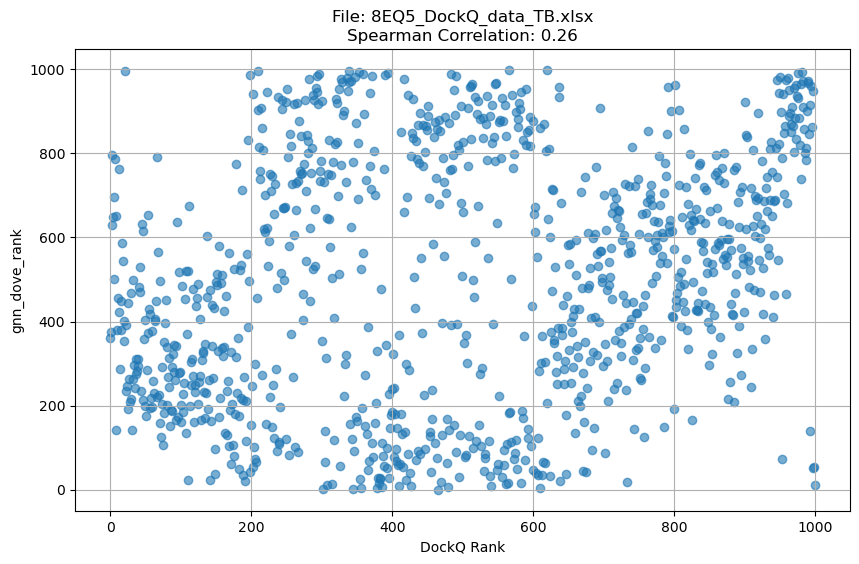

File: 8EQ5_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.26146493746493743



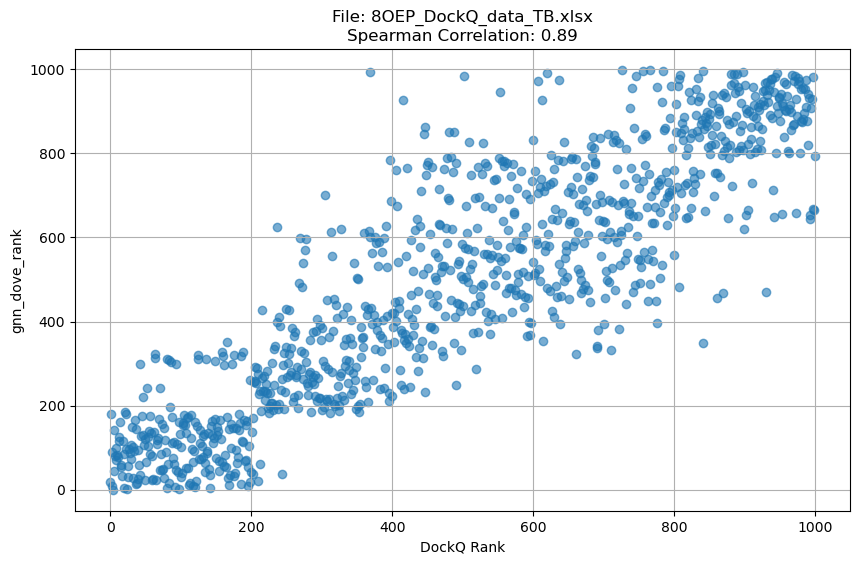

File: 8OEP_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.8873256713256714



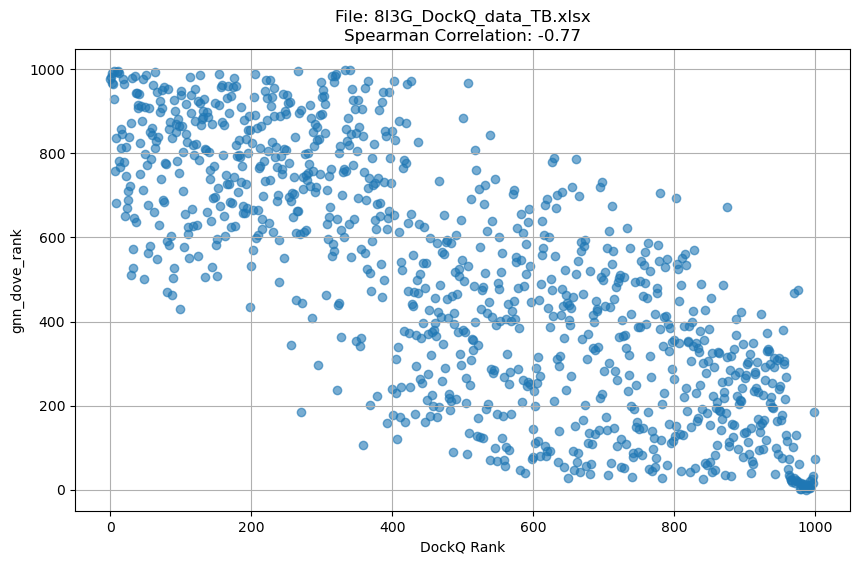

File: 8I3G_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.772996000996001



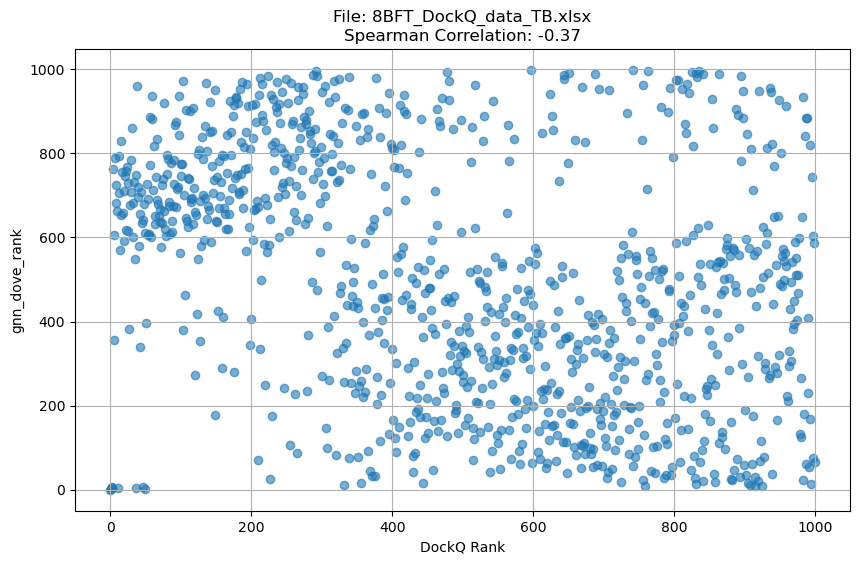

File: 8BFT_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.3688144768144768



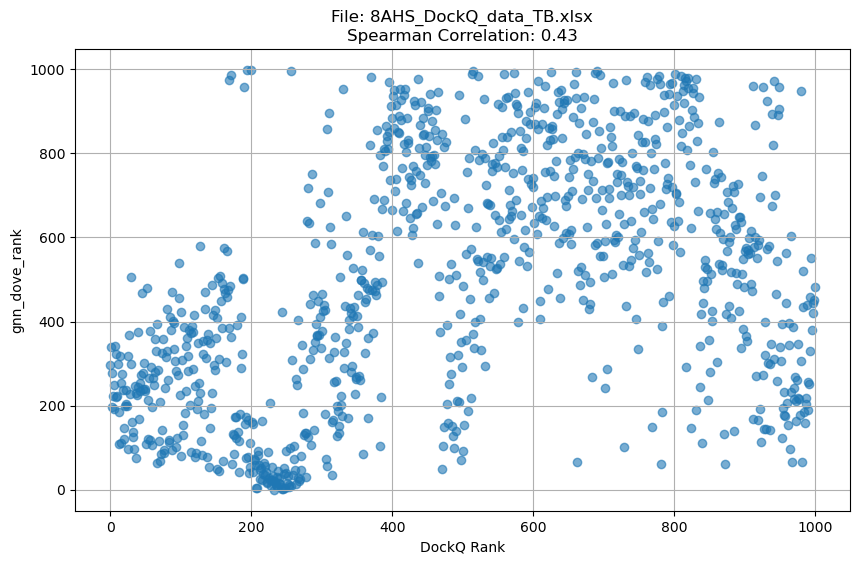

File: 8AHS_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.4322772362772363



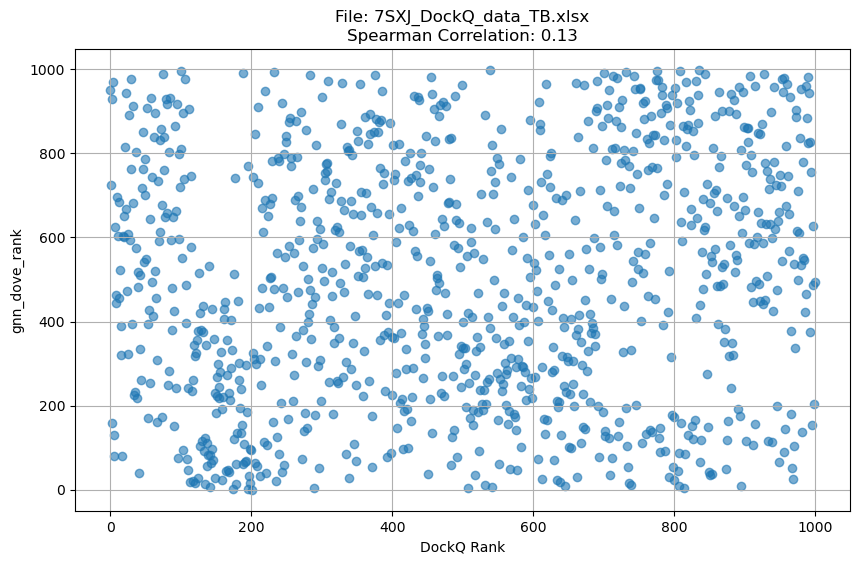

File: 7SXJ_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.13464241464241464



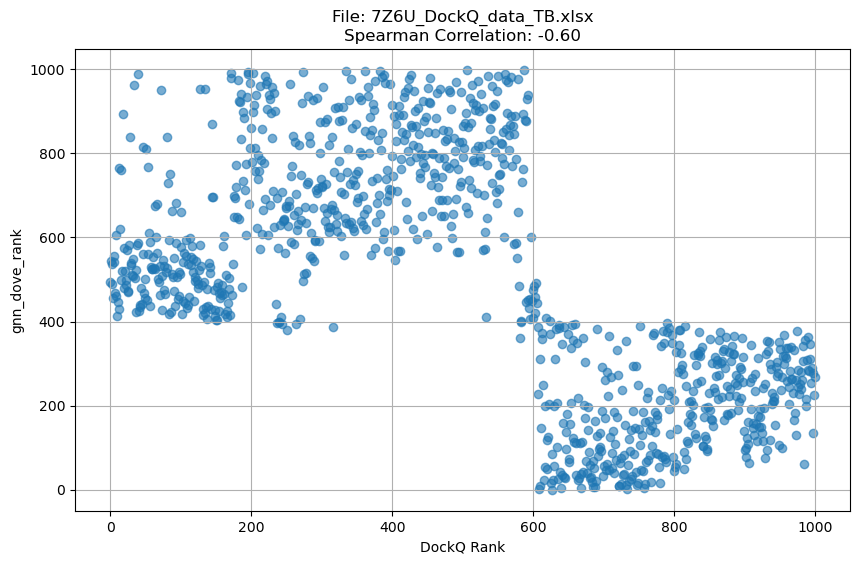

File: 7Z6U_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.5959370479370479



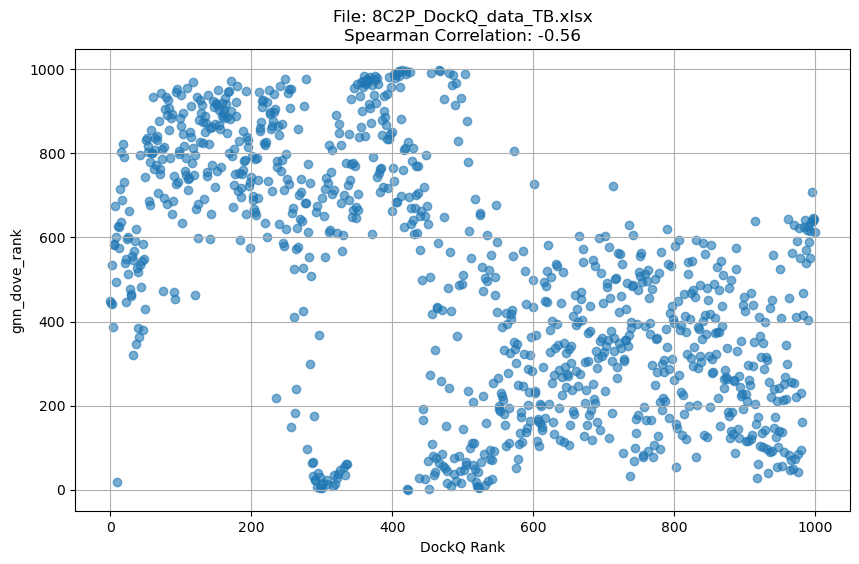

File: 8C2P_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.5635578955578956



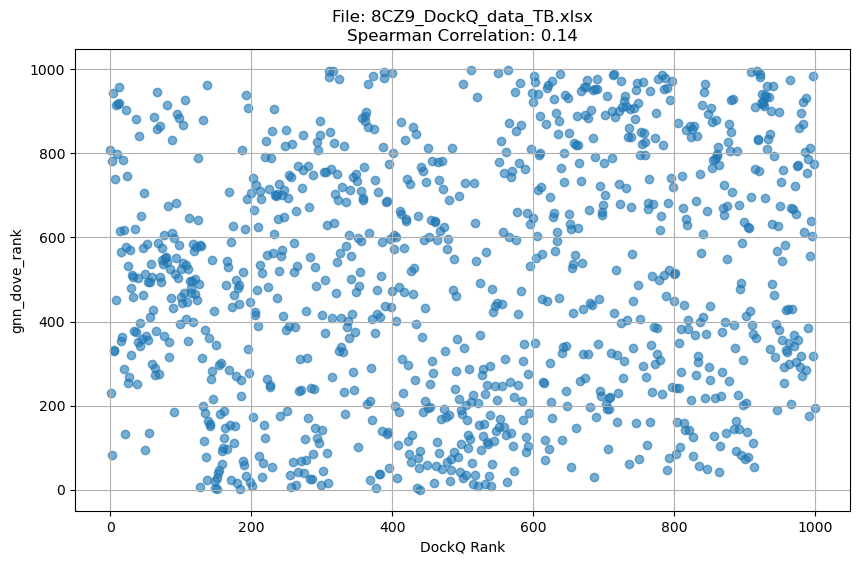

File: 8CZ9_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.140000996000996



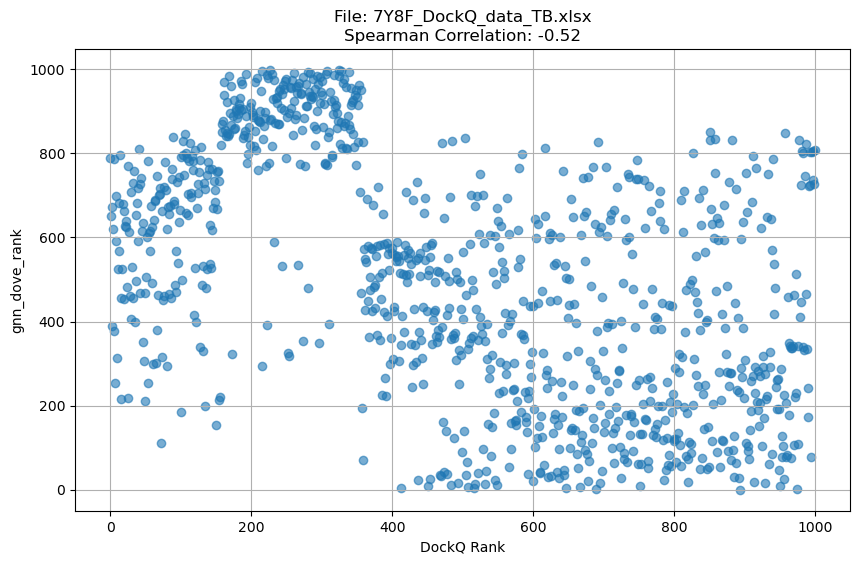

File: 7Y8F_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.5187336627336627



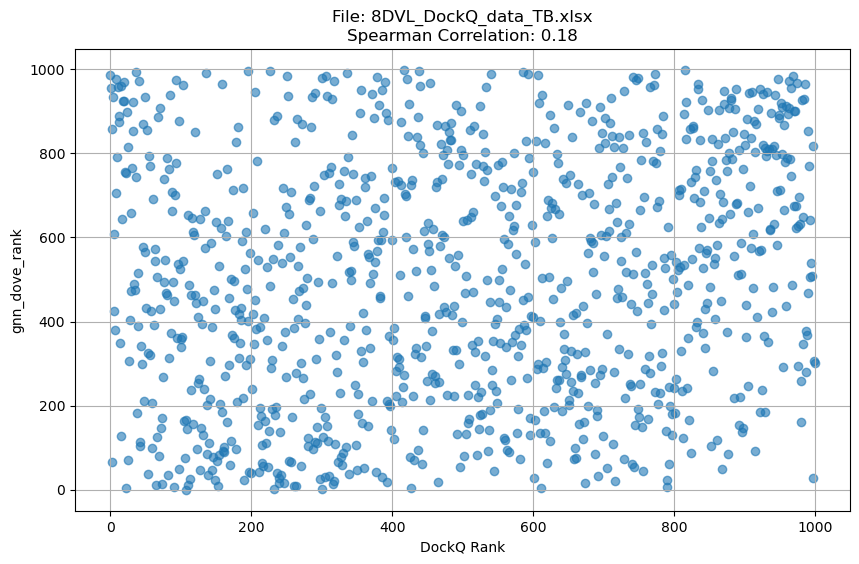

File: 8DVL_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.17918605118605122



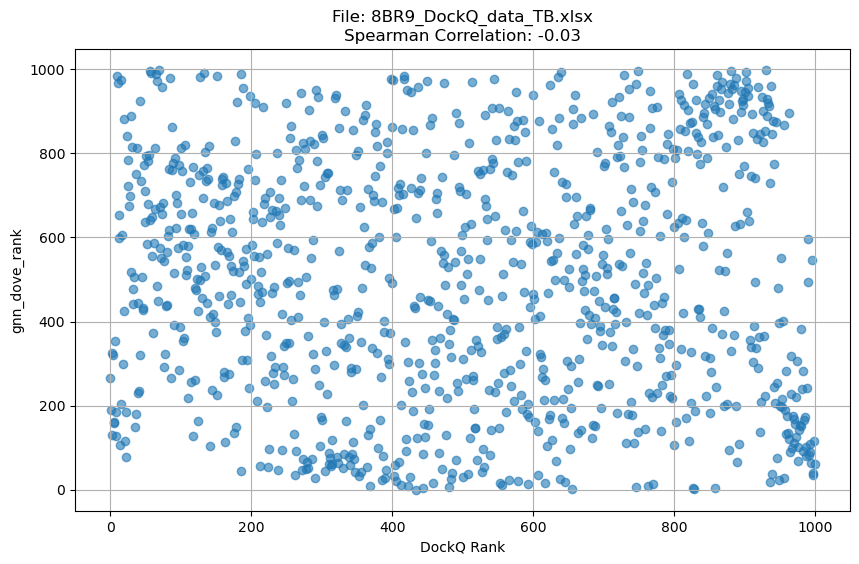

File: 8BR9_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.029961077961077963



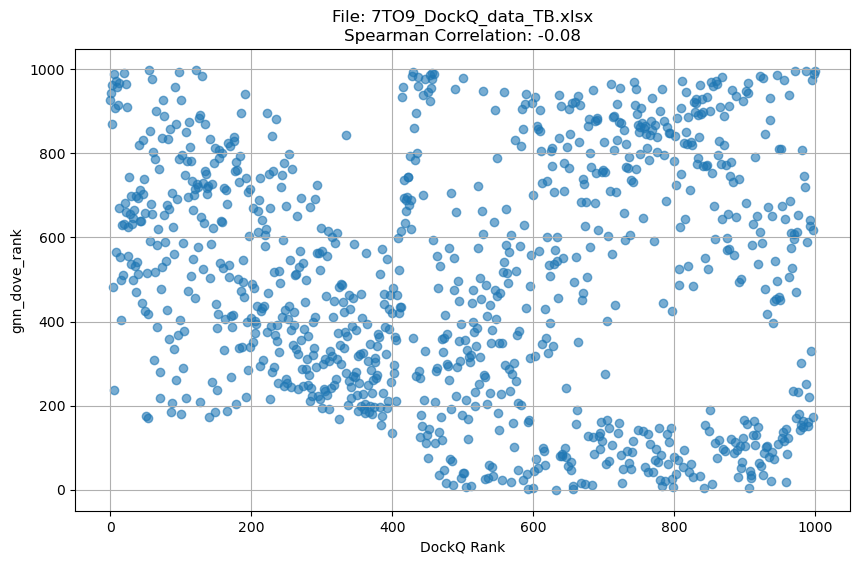

File: 7TO9_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.08082948882948883



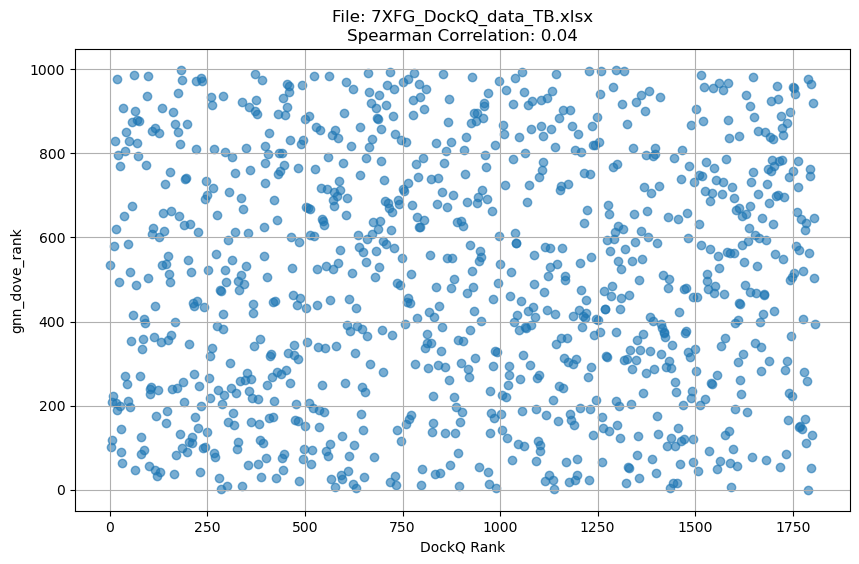

File: 7XFG_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.039132135132135135



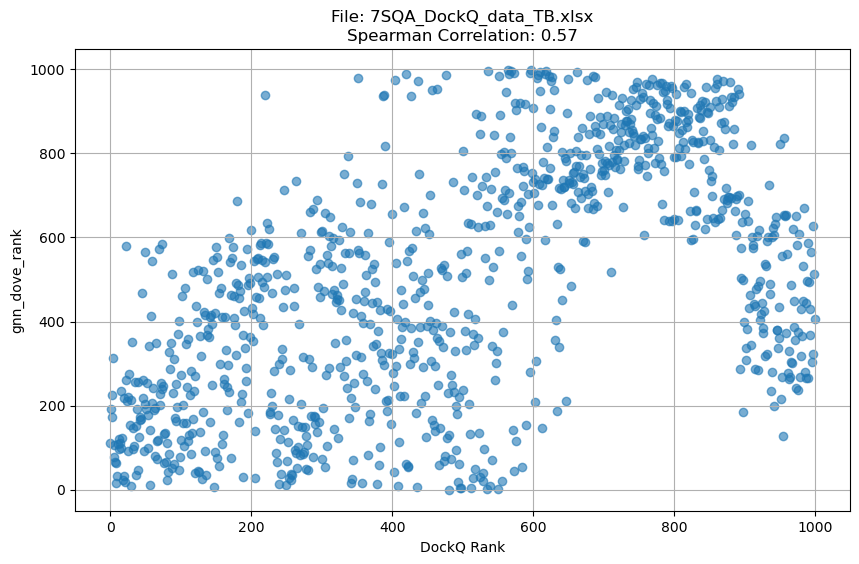

File: 7SQA_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.5669058389058389



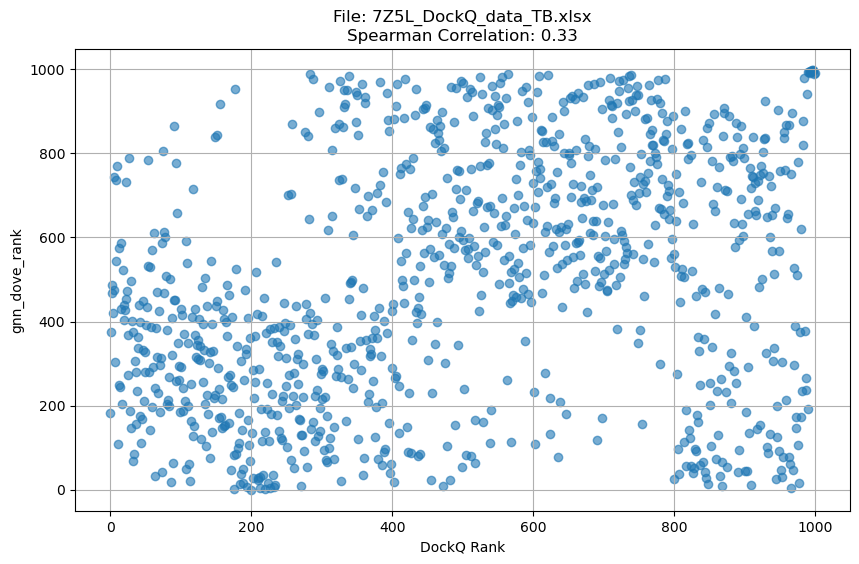

File: 7Z5L_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.32878529278529284



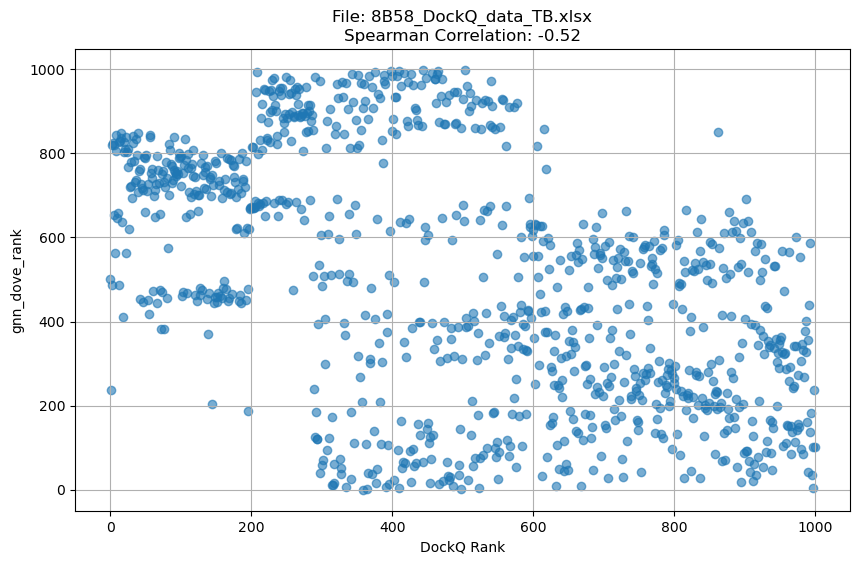

File: 8B58_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: -0.5216383616383617



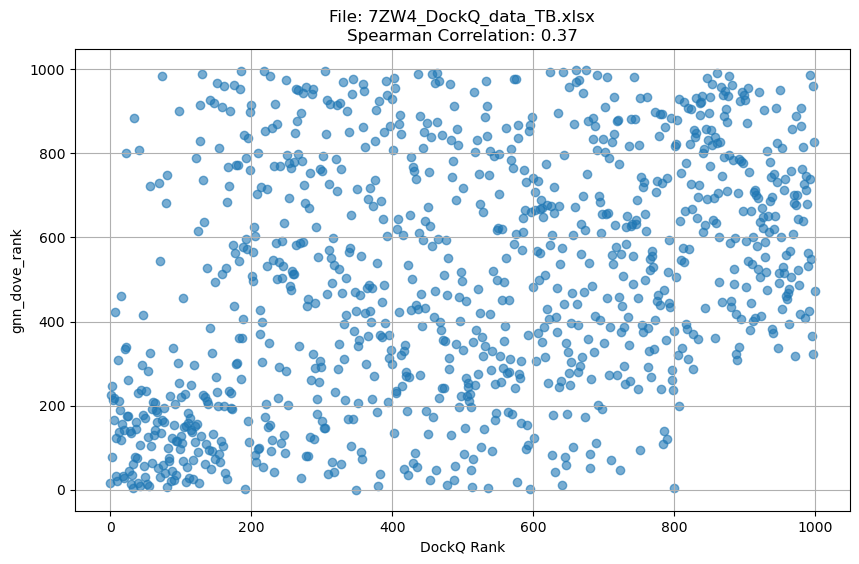

File: 7ZW4_DockQ_data_TB.xlsx
Spearman Correlation Coefficient: 0.3733100413100413

Summary of Spearman correlations saved to /Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Spearman_Correlation/TB_Spearman/correlations_gnn_dove_TB.xlsx


In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from zipfile import BadZipFile

def process_excel_files(directory_path, output_directory):
    excel_files = [f for f in os.listdir(directory_path) if f.endswith('.xlsx')]
    correlations = []  # To store file names and their Spearman correlations
    
    for excel_file in excel_files:
        excel_file_path = os.path.join(directory_path, excel_file)
        
        try:
            xls = pd.ExcelFile(excel_file_path)
        except BadZipFile:
            print(f'Error: The file "{excel_file}" is not a valid Excel file or is corrupted.')
            continue
        except Exception as e:
            print(f'An unexpected error occurred while processing {excel_file}: {e}')
            continue
        
        required_sheets = ['Sheet', 'gnn_dove']
        missing_sheets = [sheet for sheet in required_sheets if sheet not in xls.sheet_names]
        
        if missing_sheets:
            print(f'The file "{excel_file}" does not contain the following sheet(s): {", ".join(missing_sheets)}.')
            continue

        dockq_df = pd.read_excel(excel_file_path, sheet_name='Sheet')
        Foldx_df = pd.read_excel(excel_file_path, sheet_name='gnn_dove')
        
        Foldx_rank_column = 'dove rank'
        alpha_to_dockq_map = dockq_df.set_index('AlphaFold Rank')['DockQ Rank'].to_dict()
        Foldx_df['DockQ Rank'] = Foldx_df['AlphaFold Rank'].map(alpha_to_dockq_map)
        
        filtered_Foldx_df = Foldx_df.dropna(subset=['DockQ Rank'])
        
        spearman_corr, _ = spearmanr(filtered_Foldx_df[Foldx_rank_column], filtered_Foldx_df['DockQ Rank'])
        
        plt.figure(figsize=(10, 6))
        plt.scatter(filtered_Foldx_df['DockQ Rank'], filtered_Foldx_df[Foldx_rank_column], alpha=0.6)
        plt.title(f'File: {excel_file}\nSpearman Correlation: {spearman_corr:.2f}')
        plt.xlabel('DockQ Rank')
        plt.ylabel('gnn_dove_rank')
        plt.grid(True)
        plt.show()

        # Append file name and Spearman correlation to the list
        correlations.append({'File Name': excel_file, 'Spearman Correlation': spearman_corr})
        print(f'File: {excel_file}\nSpearman Correlation Coefficient: {spearman_corr}\n')
    
    # Convert list to DataFrame
    correlations_df = pd.DataFrame(correlations)
    
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Path for the new Excel file
    output_file_path = os.path.join(output_directory, 'correlations_gnn_dove_TB.xlsx')
    
    # Save DataFrame to an Excel file
    correlations_df.to_excel(output_file_path, index=False)
    print(f'Summary of Spearman correlations saved to {output_file_path}')

# Assuming config is defined elsewhere
directory_path = os.path.join(config['output_directories'], 'Dove_DockQ_TB')
output_directory = config['Spearman_Correlation_directory_TB']

process_excel_files(directory_path, output_directory)


In [25]:
import os
import pandas as pd

# Directory containing the Excel files
directory_path = f"{config['output_directories']}/Dove_DockQ_TB"

# Initialize a list to store the results
results = []

# List all Excel files in the directory
excel_files = [file for file in os.listdir(directory_path) if file.endswith('.xlsx')]

for file_name in excel_files:
    file_path = os.path.join(directory_path, file_name)
    xls = pd.ExcelFile(file_path)

    # Extract pdb_id from file name
    pdb_id = file_name.split('_')[0]

    # Load data from "Foldx" sheet
    foldx_df = pd.read_excel(file_path, sheet_name='gnn_dove')
    structure_name_for_rank_zero = foldx_df[foldx_df['dove rank'] == 0]['Filename'].iloc[0]

    # Load data from "Sheet" sheet
    sheet_df = pd.read_excel(file_path, sheet_name='Sheet')

    # Highest DockQ score
    highest_dockq_score = sheet_df['DockQ'].max()

    # DockQ score for the structure from Foldx
    highest_foldx_dockq_score = sheet_df[sheet_df['File Name'].str.contains(structure_name_for_rank_zero)]['DockQ'].max()

    # Calculate Loss
    score_Loss = highest_dockq_score - highest_foldx_dockq_score

    # Append results
    results.append([pdb_id, highest_dockq_score, highest_foldx_dockq_score, score_Loss])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['File Name', 'DockQ', 'gnn_dove ranked', 'Loss'])

# Save the results into a new Excel file
#output_path = '/Users/neginmanshour/Desktop/Dove/gnn_dove/GNN_Dove/Loss/gnn_dove_TB.xlsx'
output_directory = config["DockQ_Loss_directory_TB"]
output_path = os.path.join(output_directory, 'gnn_dove_TB.xlsx')
results_df.to_excel(output_path, index=False)

print(f"Results have been saved to {output_path}")



Results have been saved to /Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/gnn_dove_TB.xlsx


In [26]:
import pandas as pd

def calculate_positive_negative_percentages_and_average(file_path):
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Count the total number of entries
    total_entries = len(data['Spearman Correlation'])
    
    # Count the number of positive and negative Pyros_Spearman Correlation values
    positive_count = data[data['Spearman Correlation'] > 0].shape[0]
    negative_count = data[data['Spearman Correlation'] < 0].shape[0]
    
    # Calculate percentages
    positive_percentage = (positive_count / total_entries) * 100
    negative_percentage = (negative_count / total_entries) * 100
    
    # Calculate the average of Dove_Spearman Correlation values
    average_correlation = data['Spearman Correlation'].mean()
    
    return positive_percentage, negative_percentage, average_correlation

# Example usage
#file_path = '/Users/neginmanshour/Desktop/Dove/gnn_dove/GNN_Dove/Correlation_gnn_Dove_TB/correlations_gnn_dove_TB.xlsx'  # Replace with the actual path to your Excel file
file_path = f"{config['Spearman_Correlation_directory_TB']}/correlations_gnn_dove_TB.xlsx"
positive_percentage, negative_percentage, average_correlation = calculate_positive_negative_percentages_and_average(file_path)
print(f"Positive Deep_gnn_Spearman Correlation: {positive_percentage:.2f}%")
print(f"Negative Deep_gnn_Spearman Correlation: {negative_percentage:.2f}%")
print(f"Average Deep_gnn_Spearman Correlation: {average_correlation:.2f}")


Positive Deep_gnn_Spearman Correlation: 55.93%
Negative Deep_gnn_Spearman Correlation: 44.07%
Average Deep_gnn_Spearman Correlation: 0.01
